In [1]:
import sqlite3

# Step 1: Connect to a new SQLite database (or create if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create a 'sales' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Step 3: Insert completely new & unique sample data
sample_data = [
    ('Ice Cream', 14, 3.0),
    ('Lemonade', 20, 1.8),
    ('Protein Bar', 10, 2.5),
    ('Coconut Water', 8, 4.5),
    ('Herbal Tea', 18, 2.2),
    ('Ice Cream', 6, 3.0),
    ('Lemonade', 12, 1.8),
    ('Protein Bar', 7, 2.5),
    ('Coconut Water', 5, 4.5),
    ('Herbal Tea', 10, 2.2)
]

# Insert all rows into table
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)

# Commit changes and close connection
conn.commit()
conn.close()

print("✅ Database 'sales_data.db' created with unique sample data inserted!")


✅ Database 'sales_data.db' created with unique sample data inserted!


In [2]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# Run SQL query to fetch data
query = "SELECT * FROM sales"
df = pd.read_sql_query(query, conn)

# Show the data
print("📋 Sample Data from sales table:")
df


📋 Sample Data from sales table:


,id,product,quantity,price
0,1,Ice Cream,14,3.0
1,2,Lemonade,20,1.8
2,3,Protein Bar,10,2.5
3,4,Coconut Water,8,4.5
4,5,Herbal Tea,18,2.2
5,6,Ice Cream,6,3.0
6,7,Lemonade,12,1.8
7,8,Protein Bar,7,2.5
8,9,Coconut Water,5,4.5
9,10,Herbal Tea,10,2.2


Add Revenue Column

In [3]:
df['revenue'] = df['quantity'] * df['price']
df


,id,product,quantity,price,revenue
0,1,Ice Cream,14,3.0,42.0
1,2,Lemonade,20,1.8,36.0
2,3,Protein Bar,10,2.5,25.0
3,4,Coconut Water,8,4.5,36.0
4,5,Herbal Tea,18,2.2,39.6
5,6,Ice Cream,6,3.0,18.0
6,7,Lemonade,12,1.8,21.6
7,8,Protein Bar,7,2.5,17.5
8,9,Coconut Water,5,4.5,22.5
9,10,Herbal Tea,10,2.2,22.0


 Basic Stats (Total Revenue, Quantity, etc.)

In [4]:
print("🧾 Total Revenue:", df['revenue'].sum())
print("🧺 Total Quantity Sold:", df['quantity'].sum())
print("🧠 Average Price per Unit:", df['price'].mean())


🧾 Total Revenue: 280.2
🧺 Total Quantity Sold: 110
🧠 Average Price per Unit: 2.8


 Revenue by Product

In [5]:
revenue_by_product = df.groupby('product')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)
revenue_by_product


,product,revenue
1,Herbal Tea,61.6
2,Ice Cream,60.0
0,Coconut Water,58.5
3,Lemonade,57.6
4,Protein Bar,42.5


Total quantity sold by product

In [6]:
quantity_by_product = df.groupby('product')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
quantity_by_product


,product,quantity
3,Lemonade,32
1,Herbal Tea,28
2,Ice Cream,20
4,Protein Bar,17
0,Coconut Water,13


Visualization
📊 1. Bar Plot – Revenue by Product

<ipython-input-7-4fbf837f77c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='revenue', data=revenue_by_product, palette='viridis')


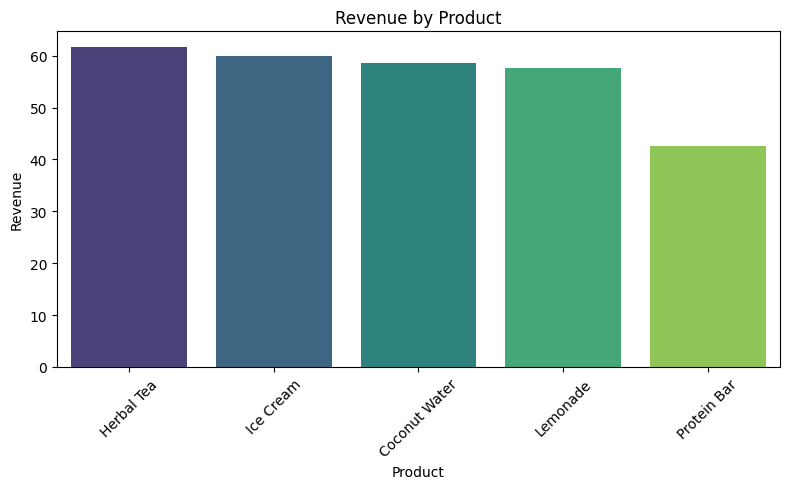

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='product', y='revenue', data=revenue_by_product, palette='viridis')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🧁 2. Pie Chart – Product-wise Share in Total Quantity Sold

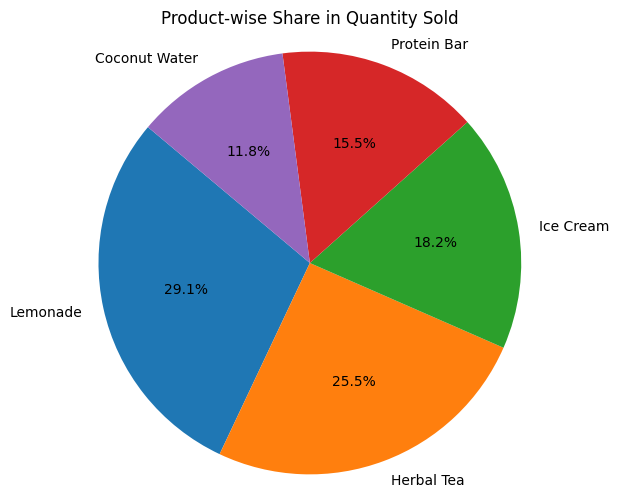

In [8]:
plt.figure(figsize=(6,6))
plt.pie(quantity_by_product['quantity'], labels=quantity_by_product['product'], autopct='%1.1f%%', startangle=140)
plt.title('Product-wise Share in Quantity Sold')
plt.axis('equal')
plt.show()


📘 Summary Table
We’ll show product-wise total quantity and revenue in a clean table:

# 🧾 Task 7 – Sales Summary using SQLite and Python

**Objective**:  
Connect to a SQLite database using Python, run a basic SQL query to fetch product-wise total quantity and revenue, and visualize the result using a bar chart. This task helps in practicing SQL inside Python using `sqlite3`, `pandas`, and `matplotlib`.


In [9]:
summary_table = df.groupby('product').agg(
    total_quantity=('quantity', 'sum'),
    total_revenue=('revenue', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

summary_table


,product,total_quantity,total_revenue
1,Herbal Tea,28,61.6
2,Ice Cream,20,60.0
0,Coconut Water,13,58.5
3,Lemonade,32,57.6
4,Protein Bar,17,42.5
